In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Raisin_Dataset.csv')

In [3]:
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
decision_stump = DecisionTreeClassifier(max_depth=1)
decision_stump.fit(X_train, y_train)
y_pred_stump = decision_stump.predict(X_test)
accuracy_stump = accuracy_score(y_test, y_pred_stump)

In [5]:
# Total number of weak learner=1
adaboost_1 = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=1, random_state=42)
adaboost_1.fit(X_train, y_train)
y_pred_adaboost_1 = adaboost_1.predict(X_test)
accuracy_adaboost_1 = accuracy_score(y_test, y_pred_adaboost_1)

In [6]:
# Total number of weak learner=2
adaboost_2 = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=2, random_state=42)
adaboost_2.fit(X_train, y_train)
y_pred_adaboost_2 = adaboost_2.predict(X_test)
accuracy_adaboost_2 = accuracy_score(y_test, y_pred_adaboost_2)

In [7]:
# Total number of weak learner=3
adaboost_3 = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=3, random_state=42)
adaboost_3.fit(X_train, y_train)
y_pred_adaboost_3 = adaboost_3.predict(X_test)
accuracy_adaboost_3 = accuracy_score(y_test, y_pred_adaboost_3)

In [8]:
# Total number of weak learner=n
n = 10
adaboost_n = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=n, random_state=42)
adaboost_n.fit(X_train, y_train)
y_pred_adaboost_n = adaboost_n.predict(X_test)
accuracy_adaboost_n = accuracy_score(y_test, y_pred_adaboost_n)


In [9]:
results = pd.DataFrame({
    'Model': ['Decision Stump', 'Adaboost (1 learner)', 'Adaboost (2 learners)', 
              'Adaboost (3 learners)', f'Adaboost ({n} learners)'],
    'Accuracy': [accuracy_stump, accuracy_adaboost_1, accuracy_adaboost_2, 
                 accuracy_adaboost_3, accuracy_adaboost_n]
})

print(results)


                    Model  Accuracy
0          Decision Stump  0.850000
1    Adaboost (1 learner)  0.850000
2   Adaboost (2 learners)  0.850000
3   Adaboost (3 learners)  0.850000
4  Adaboost (10 learners)  0.861111


In [10]:
num_learners = list(range(1, 61))
accuracies = []

for n in num_learners:
    adaboost_n = AdaBoostClassifier(base_estimator=decision_stump, n_estimators=n, random_state=42)
    adaboost_n.fit(X_train, y_train)
    y_pred_adaboost_n = adaboost_n.predict(X_test)
    accuracy_adaboost_n = accuracy_score(y_test, y_pred_adaboost_n)
    accuracies.append(accuracy_adaboost_n)


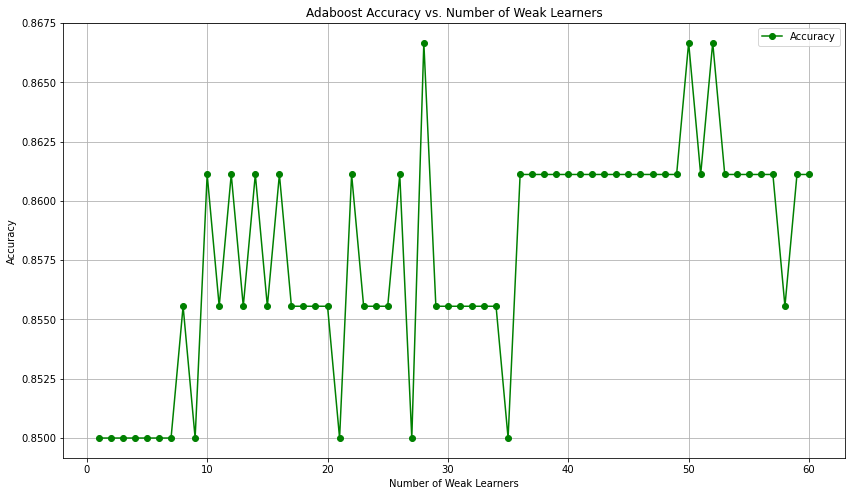

In [11]:
plt.figure(figsize=(14, 8))
plt.plot(num_learners, accuracies, marker='o', linestyle='-', color='g', label='Accuracy')
plt.title('Adaboost Accuracy vs. Number of Weak Learners')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()